## The Euler-Lagrange equations 

The Lagrangian $L$ is defined as:

$$
L = T - V
$$
where
- $T$ is the kinetic energy
- $V$ is the potential energy

### simple spring mass system

wall ---- spring ---- mass

In [226]:
from sympy import symbols, Function, Matrix, Eq, sin, cos, simplify

In [227]:
t = symbols('t')
x = Function('x')(t)
dot_x = x.diff(t)
k = symbols('k')  # spring constant
m = symbols('m')  # mass

# Euler-Lagrange Equation
L = symbols('L')
T = symbols('T')  # Kinetic Energy
V = symbols('V')  # Potential Energy

T = (1/2) * m * (dot_x ** 2)
V = (1/2) * k * (x ** 2)
L = T - V

In [228]:
L

-0.5*k*x(t)**2 + 0.5*m*Derivative(x(t), t)**2

Equations:

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x}} \right) - \frac{\partial L}{\partial x} = Q
$$

where
- $x$ represents the generalized coordinates
- $\dot{x}$ represents the generalized velocities
- $Q$ represents the generalized forces

In [229]:
# in a closed system, Q = 0
dL_dxdot = L.diff(dot_x)
dL_dx = L.diff(x)
Q = 0

euler_lagrange_eq = Eq(dL_dxdot.diff(t) - dL_dx, Q)
simplify(euler_lagrange_eq)

Eq(1.0*k*x(t) + 1.0*m*Derivative(x(t), (t, 2)), 0)

### Rolling wheel with no slip constraint

### two-mass spring system

Wall ---- spring1 ---- mass1 ---- spring2 ---- mass2

In [230]:
m_1, m_2 = symbols('m_1 m_2')  # point masses
k_1, k_2 = symbols('k_1 k_2')  # spring constants
x_1, x_2 = Function('x_1')(t), Function('x_2')(t)  # positions
dot_x_1, dot_x_2 = x_1.diff(t), x_2.diff(t)  # velocities

T = (1/2) * m_1 * (dot_x_1 ** 2) + (1/2) * m_2 * (dot_x_2 ** 2)
V = (1/2) * k_1 * (x_1 ** 2) + (1/2) * k_2 * ((x_2 - x_1) ** 2)
L = T - V

In [231]:
dL_ddot_x_1 = L.diff(dot_x_1)
dL_dx_1 = L.diff(x_1)
Q_1 = 0

dL_ddot_x_2 = L.diff(dot_x_2)
dL_dx_2 = L.diff(x_2)
Q_2 = 0

constraint_1 = Eq(dL_ddot_x_1.diff(t) - dL_dx_1, Q_1)
constraint_2 = Eq(dL_ddot_x_2.diff(t) - dL_dx_2, Q_2)

In [232]:
constraint_1.simplify()


Eq(1.0*k_1*x_1(t) + 1.0*k_2*(x_1(t) - x_2(t)) + 1.0*m_1*Derivative(x_1(t), (t, 2)), 0)

In [233]:
constraint_2.simplify()

Eq(1.0*k_2*(x_1(t) - x_2(t)) - 1.0*m_2*Derivative(x_2(t), (t, 2)), 0)

In [234]:
from sympy import solve

dot_dot_x_1 = x_1.diff(t, 2)
dot_dot_x_2 = x_2.diff(t, 2)

solutions = solve([constraint_1, constraint_2], (dot_dot_x_1, dot_dot_x_2))

In [235]:
solutions


{Derivative(x_1(t), (t, 2)): -k_1*x_1(t)/m_1 - k_2*x_1(t)/m_1 + k_2*x_2(t)/m_1,
 Derivative(x_2(t), (t, 2)): k_2*x_1(t)/m_2 - k_2*x_2(t)/m_2}

### a particle moving in an arbitrary potential field $V(x)$

In [236]:
t = symbols('t')
x = Function('x')(t)
V = Function('V')(x)  # arbitrary potential function

T = (1/2) * symbols('m') * (x.diff(t) ** 2)
L = T - V

In [237]:
dL_ddot_x = L.diff(x.diff(t))
dL_dx = L.diff(x)
Q = 0

constraint = Eq(dL_ddot_x.diff(t) - dL_dx, Q)

In [238]:
constraint


Eq(1.0*m*Derivative(x(t), (t, 2)) + Derivative(V(x(t)), x(t)), 0)

### particle moving in 3D potential field $V(x, y, z)$

In [239]:
t = symbols('t')
x = Function('x')(t)
y = Function('y')(t)
z = Function('z')(t)

dot_x = x.diff(t)
dot_y = y.diff(t)
dot_z = z.diff(t)
V = Function('V')(x, y, z)  # arbitrary potential function

T = (1/2) * symbols('m') * (dot_x ** 2 + dot_y ** 2 + dot_z ** 2)
L = T - V

In [240]:
import sympy as sp

dL_ddot_x = L.diff(dot_x)
dL_dx = L.diff(x)
Q_x = 0

dL_ddot_y = L.diff(dot_y)
dL_dy = L.diff(y)
Q_y = 0

dL_ddot_z = L.diff(dot_z)
dL_dz = L.diff(z)
Q_z = 0

EL_x = Eq(dL_ddot_x.diff(t) - dL_dx, Q_x)
EL_y = Eq(dL_ddot_y.diff(t) - dL_dy, Q_y)
EL_z = Eq(dL_ddot_z.diff(t) - dL_dz, Q_z)

EL_x_s, EL_y_s, EL_z_s = map(sp.simplify, [EL_x, EL_y, EL_z])
EL_x_s, EL_y_s, EL_z_s

(Eq(1.0*m*Derivative(x(t), (t, 2)) + Derivative(V(x(t), y(t), z(t)), x(t)), 0),
 Eq(1.0*m*Derivative(y(t), (t, 2)) + Derivative(V(x(t), y(t), z(t)), y(t)), 0),
 Eq(1.0*m*Derivative(z(t), (t, 2)) + Derivative(V(x(t), y(t), z(t)), z(t)), 0))

In [241]:
# Define vector of coordinates and accelerations
q = sp.Matrix([x, y, z])
ddq = sp.Matrix([x.diff(t, 2), y.diff(t, 2), z.diff(t, 2)])

# Mass matrix (scalar m * Identity since isotropic)
M = m * sp.eye(3)

# Gradient of potential
gradV = sp.Matrix([sp.diff(V, x), sp.diff(V, y), sp.diff(V, z)])

# Generalized equation: M * ddq + gradV = 0
EL_vector = sp.Eq(M * ddq + gradV, sp.zeros(3, 1))
EL_vector

Eq(Matrix([
[m*Derivative(x(t), (t, 2)) + Derivative(V(x(t), y(t), z(t)), x(t))],
[m*Derivative(y(t), (t, 2)) + Derivative(V(x(t), y(t), z(t)), y(t))],
[m*Derivative(z(t), (t, 2)) + Derivative(V(x(t), y(t), z(t)), z(t))]]), Matrix([
[0],
[0],
[0]]))

In [242]:
ddq_solution = sp.solve(EL_vector, ddq)
ddq_solution


{Derivative(x(t), (t, 2)): -Derivative(V(x(t), y(t), z(t)), x(t))/m,
 Derivative(y(t), (t, 2)): -Derivative(V(x(t), y(t), z(t)), y(t))/m,
 Derivative(z(t), (t, 2)): -Derivative(V(x(t), y(t), z(t)), z(t))/m}

### Spring pendulum system

- $m$ : mass of the pendulum bob
- $k$ : spring constant
- $l$ : natural length of the spring
- $g$ : acceleration due to gravity
- $\theta$ : angle of the pendulum from the vertical
- $x(t)$ : length of the spring at time $t$ relative to the pivot point

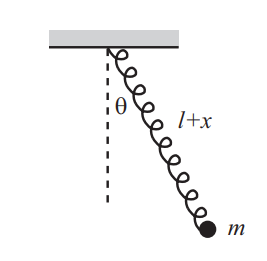

In [243]:
t = symbols('t')
theta = Function('theta')(t)  # angle of the pendulum from the vertical
dot_theta = theta.diff(t)
x = Function('x')(t)  # length of the spring at time t relative to
dot_x = x.diff(t)
l = symbols('l')  # natural length of the spring
m = symbols('m')  # mass of the pendulum bob
k = symbols('k')  # spring constant
g = symbols('g')  # acceleration due to gravity

# total kinetic energy = tangential part + radial part
tangential_part = 1/2 * m * dot_x**2
radial_part = 1 / 2 * m * ((x + l) * dot_theta) ** 2
T = tangential_part + radial_part

In [244]:
from sympy import sin, cos
# total potential energy = spring potential + gravitational potential
spring_potential = 1/2 * k * (x ** 2)
gravitational_potential = -m * g * (x + l) * cos(theta)
V = spring_potential + gravitational_potential


In [245]:
L = T - V
L

g*m*(l + x(t))*cos(theta(t)) - 0.5*k*x(t)**2 + 0.5*m*(l + x(t))**2*Derivative(theta(t), t)**2 + 0.5*m*Derivative(x(t), t)**2

In [246]:
dL_ddot_x = L.diff(dot_x)
dL_dx = L.diff(x)
Q_x = 0

dL_ddot_theta = L.diff(dot_theta)
dL_dtheta = L.diff(theta)
Q_theta = 0

EL_x = Eq(dL_ddot_x.diff(t) - dL_dx, Q_x)
EL_theta = Eq(dL_ddot_theta.diff(t) - dL_dtheta, Q_theta)

In [247]:
EL_theta.simplify()


Eq(m*(l + x(t))*(g*sin(theta(t)) + 1.0*(l + x(t))*Derivative(theta(t), (t, 2)) + 2.0*Derivative(theta(t), t)*Derivative(x(t), t)), 0)

In [248]:
EL_x.simplify()

Eq(g*m*cos(theta(t)) - 1.0*k*x(t) + 1.0*m*(l + x(t))*Derivative(theta(t), t)**2 - 1.0*m*Derivative(x(t), (t, 2)), 0)

In [249]:
from sympy import pi
## simulation
k = 1.0
m = 1.0
g = 9.81
l = 2.0

EL_theta.subs({k: k, m: m, g: g, l: l})
EL_x.subs({k: k, m: m, g: g, l: l})


Eq(-g*m*cos(theta(t)) + 1.0*k*x(t) - 0.5*m*(2*l + 2*x(t))*Derivative(theta(t), t)**2 + 1.0*m*Derivative(x(t), (t, 2)), 0)

### particles in a gravitatioanl potential

In [250]:
t = symbols('t')
y = Function('y')(t)  # vertical position
dot_y = y.diff(t)
m = symbols('m')  # mass
g = symbols('g')  # acceleration due to gravity

T = (1/2) * m * (dot_y ** 2)
V = m * g * y

L = T - V

In [251]:
dL_ddot_y = L.diff(dot_y)
dL_dy = L.diff(y)
Q = 0

EL_y = Eq(dL_ddot_y.diff(t) - dL_dy, Q)
EL_y.simplify()

Eq(m*(g + 1.0*Derivative(y(t), (t, 2))), 0)

### Particle in a Central force Field $V(r)$

In [252]:
t = symbols('t')
r = Function('r')(t)  # radial distance
dot_r = r.diff(t)  # radial velocity
theta = Function('theta')(t)  # angular position
dot_theta = theta.diff(t)
m = symbols('m')  # mass

# Total kinetic energy = tangential_part + radial_part
tangential_part = (1/2) * m * (r * dot_theta) ** 2
radial_part = (1/2) * m * (dot_r ** 2)

T = tangential_part + radial_part

# Potential energy V(r)
V = Function('V')(r)

L = T - V

In [253]:
L

0.5*m*r(t)**2*Derivative(theta(t), t)**2 + 0.5*m*Derivative(r(t), t)**2 - V(r(t))

In [254]:
dL_ddot_r = L.diff(dot_r)
dL_dr = L.diff(r)
Q_r = 0

dL_ddot_theta = L.diff(dot_theta)
dL_dtheta = L.diff(theta)
Q_theta = 0

EL_r = Eq(dL_ddot_r.diff(t) - dL_dr, Q_r)
EL_theta = Eq(dL_ddot_theta.diff(t) - dL_dtheta, Q_theta)

In [255]:
EL_r.simplify()

Eq(-1.0*m*r(t)*Derivative(theta(t), t)**2 + 1.0*m*Derivative(r(t), (t, 2)) + 1.0*Derivative(V(r(t)), r(t)), 0)

In [256]:
EL_theta.simplify() # conservation of angular momentum

Eq(m*(1.0*r(t)*Derivative(theta(t), (t, 2)) + 2.0*Derivative(r(t), t)*Derivative(theta(t), t))*r(t), 0)

### Double pendulum system with 2 point masses

In [257]:
t = symbols('t')
m_1, m_2 = symbols('m_1 m_2')  # masses
l_1, l_2 = symbols('l_1 l_2')  #
theta_1, theta_2 = Function('theta_1')(t), Function('theta_2')(t)  # angles
dot_theta_1, dot_theta_2 = theta_1.diff(t), theta_2.diff(t)  # angular velocities
g = symbols('g')  # acceleration due to gravity

# Coordinate expression
x_1 = l_1 * sin(theta_1)
y_1 = -l_1 * cos(theta_1)

x_2 = x_1 + l_2 * sin(theta_2)
y_2 = y_1 - l_2 * cos(theta_2)

# Velocities
dot_x_1 = x_1.diff(t)
dot_y_1 = y_1.diff(t)

dot_x_2 = x_2.diff(t)
dot_y_2 = y_2.diff(t)

v_1_sq = (dot_x_1 ** 2 + dot_y_1 ** 2)
v_2_sq = (dot_x_2 ** 2 + dot_y_2 ** 2)

# Kinetic Energy
T = (1/2) * m_1 * v_1_sq + (1/2) * m_2 * v_2_sq

In [258]:
T

0.5*m_1*(l_1**2*sin(theta_1(t))**2*Derivative(theta_1(t), t)**2 + l_1**2*cos(theta_1(t))**2*Derivative(theta_1(t), t)**2) + 0.5*m_2*((l_1*sin(theta_1(t))*Derivative(theta_1(t), t) + l_2*sin(theta_2(t))*Derivative(theta_2(t), t))**2 + (l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + l_2*cos(theta_2(t))*Derivative(theta_2(t), t))**2)

In [259]:
# Potential Energy
V = m_1 * g * y_1 + m_2 * g * y_2
V

-g*l_1*m_1*cos(theta_1(t)) + g*m_2*(-l_1*cos(theta_1(t)) - l_2*cos(theta_2(t)))

In [260]:
L = T - V
L.simplify()

g*l_1*m_1*cos(theta_1(t)) + g*m_2*(l_1*cos(theta_1(t)) + l_2*cos(theta_2(t))) + 0.5*l_1**2*m_1*Derivative(theta_1(t), t)**2 + 0.5*m_2*(l_1**2*Derivative(theta_1(t), t)**2 + 2*l_1*l_2*cos(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t)*Derivative(theta_2(t), t) + l_2**2*Derivative(theta_2(t), t)**2)

In [261]:
dL_ddot_theta_1 = L.diff(dot_theta_1)
dL_dtheta_1 = L.diff(theta_1)
Q_1 = 0

dL_ddot_theta_2 = L.diff(dot_theta_2)
dL_dtheta_2 = L.diff(theta_2)
Q_2 = 0

EL_theta_1 = Eq(dL_ddot_theta_1.diff(t) - dL_dtheta_1, Q_1)
EL_theta_2 = Eq(dL_ddot_theta_2.diff(t) - dL_dtheta_2, Q_2)

In [262]:
from sympy import trigsimp
EL_theta_1_simp = trigsimp(EL_theta_1.simplify())


In [263]:
EL_theta_1_simp


Eq(1.0*l_1*(g*m_1*sin(theta_1(t)) + g*m_2*sin(theta_1(t)) + l_1*m_1*Derivative(theta_1(t), (t, 2)) + l_1*m_2*Derivative(theta_1(t), (t, 2)) + l_2*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_2(t), t)**2 + l_2*m_2*cos(theta_1(t) - theta_2(t))*Derivative(theta_2(t), (t, 2))), 0)

In [264]:

EL_theta_2_simp = trigsimp(EL_theta_2.simplify())


In [265]:
EL_theta_2_simp


Eq(1.0*l_2*m_2*(g*sin(theta_2(t)) - l_1*sin(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t)**2 + l_1*cos(theta_1(t) - theta_2(t))*Derivative(theta_1(t), (t, 2)) + l_2*Derivative(theta_2(t), (t, 2))), 0)

## action

$$
S = \int_{t_1}^{t_2} L(x, \dot{x}, t) \, dt
$$

dimension of S = energy × time = J·s

### a ball dropped from rest

In [266]:

t = symbols('t')
x = Function('x')(t)
# x(t) : position of the ball at time t
# x(0) = 0
# x(1) = -g/2


### a uniform rod rotating in a vertical plane about one end (physical pendulum)

In [267]:
t = symbols('t')
L = symbols('L') # length of the rod
m = symbols('m') # mass of the rod
g = symbols('g') # acceleration due to gravity

theta = Function('theta')(t)  # angle of the rod from the vertical
dot_theta = theta.diff(t)

In [268]:
# Total kinetic energy = translational part + rotational part
# translational_part = 0 since the rod is fixed at one end
I = 1/3 * m * L**2  # moment of inertia about one end
rotational_part = 1/2 * I * (dot_theta ** 2)

T = rotational_part
T

0.166666666666667*L**2*m*Derivative(theta(t), t)**2

In [269]:
# potential energy
h = L/2 - (L/2) * cos(theta)  # height of center of mass
V = m * g * h
V = V.simplify()

In [270]:
L = T - V
L

0.166666666666667*L**2*m*Derivative(theta(t), t)**2 - L*g*m*(1 - cos(theta(t)))/2

In [271]:
dL_ddot_theta = L.diff(dot_theta)
dL_dtheta = L.diff(theta)
Q = 0

EL_theta = Eq(dL_ddot_theta.diff(t) - dL_dtheta, Q)
EL_theta


Eq(0.333333333333333*L**2*m*Derivative(theta(t), (t, 2)) + L*g*m*sin(theta(t))/2, 0)

### free particle always moves in straight line with constant velocity

In [272]:
t = symbols("t", real=True)
m = symbols("m", positive=True, real=True)  # mass of the particle

x = Function("x")(t)
dot_x = x.diff(t)

L = (1/2) * m * (dot_x ** 2) - 0 # free particle does not have potential energy

In [273]:
dL_ddot_x = L.diff(dot_x)
dL_dx = L.diff(x)
Q_x = 0

EL = Eq(dL_ddot_x.diff(t) - dL_dx, Q_x)
EL.simplify()

Eq(1.0*m*Derivative(x(t), (t, 2)), 0)

In [274]:
solution = sp.dsolve(EL, x)
solution

Eq(x(t), C1 + C2*t)

In [275]:
# Define symbols and functions
t, t1, t2 = sp.symbols("t t1 t2", real=True)
x1, x2, m = sp.symbols("x1 x2 m", real=True)

# General solution x(t) = C1*t + C2
C1, C2 = sp.symbols("C1 C2", real=True)
x_sol = C1 * t + C2

# Apply boundary conditions: x(t1)=x1, x(t2)=x2
eqs = [sp.Eq(x_sol.subs(t, t1), x1), 
       sp.Eq(x_sol.subs(t, t2), x2)]

# Solve for C1, C2
sol_constants = sp.solve(eqs, (C1, C2))
sol_constants


{C1: (x1 - x2)/(t1 - t2), C2: (t1*x2 - t2*x1)/(t1 - t2)}

In [276]:
x_path = x_sol.subs(sol_constants)
sp.simplify(x_path)


(t*(x1 - x2) + t1*x2 - t2*x1)/(t1 - t2)

## Forces of constraint

### Particle sliding off a fixed frictionless hemisphere
- $R$ : radius of the hemisphere
- $\theta$ : angle from the vertical axis

we concern only with finding the equation of motion for $\theta(t)$.

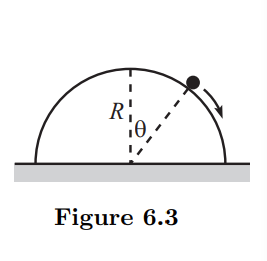

In [277]:
t = symbols('t')
R = symbols('R')  # radius of the hemisphere
m = symbols('m')  # mass of the particle
g = symbols('g')  # acceleration due to gravity
theta = Function('theta')(t)  # angle from the vertical axis
dot_theta = theta.diff(t)

T = (1/2) * symbols('m') * (R * dot_theta) ** 2

V = m * g * R * cos(theta)

L = T - V
L

0.5*R**2*m*Derivative(theta(t), t)**2 - R*g*m*cos(theta(t))

In [278]:
dL_ddot_theta = L.diff(dot_theta)
dL_dtheta = L.diff(theta)
Q_theta = 0

EL_theta = Eq(dL_ddot_theta.diff(t) - dL_dtheta, Q_theta)
EL_theta.simplify()

Eq(R*m*(1.0*R*Derivative(theta(t), (t, 2)) - g*sin(theta(t))), 0)

In [279]:
# method 2
r = Function('r')(t)
dot_r = r.diff(t)

# Total kinetic energy = radial part + tangential part
radial_part = 1/2 * m * (dot_r ** 2)
tangential_part = 1/2 * m * (r * dot_theta) ** 2
T = radial_part + tangential_part

# Total potential energy = gravitational potential + normal force potential
normal_force_potential = Function('V')(r)
gravitational_potential = m * g * r * cos(theta)
V = gravitational_potential + normal_force_potential

L = T - V

In [280]:
dL_ddot_r = L.diff(dot_r)
dL_dr = L.diff(r)
Q_r = 0

dL_ddot_theta = L.diff(dot_theta)
dL_dtheta = L.diff(theta)
Q_theta = 0

EL_theta = Eq(dL_ddot_theta.diff(t) - dL_dtheta, Q_theta)
EL_r = Eq(dL_ddot_r.diff(t) - dL_dr, Q_r)

In [281]:
# Apply constraint substitutions
subs_constraint = {r: R, 
                   sp.diff(r, t): 0, 
                   sp.diff(r, (t, 2)): 0}

EL_r_constrained = EL_r.subs(subs_constraint)
EL_theta_constrained = EL_theta.subs(subs_constraint)

In [282]:
EL_r_constrained

Eq(-1.0*R*m*Derivative(theta(t), t)**2 + g*m*cos(theta(t)) + Derivative(V(R), R), 0)

In [283]:
EL_theta_constrained

Eq(1.0*R**2*m*Derivative(theta(t), (t, 2)) - R*g*m*sin(theta(t)), 0)

### Bead sliding on a circular wire

In [284]:
t = symbols('t')
# Cartesian coordinates
x = Function('x')(t)
y = Function('y')(t)
dot_x = x.diff(t)
dot_y = y.diff(t)
m = symbols('m')  # mass

In [285]:
T = (1/2) * m * (dot_x ** 2 + dot_y ** 2)
V = m * g * y
L = T - V

In [286]:
# geometric constraint
R = symbols('R')  # radius of the circular wire
constraint = x ** 2 + y ** 2 - R ** 2

lambda_ = symbols('lambda')  # Lagrange multiplier

L_augmented = L + lambda_ * constraint

In [287]:
dL_augmented_ddot_x = L_augmented.diff(dot_x)
dL_augmented_dx = L_augmented.diff(x)
Q_x = 0

dL_augmented_ddot_y = L_augmented.diff(dot_y)
dL_augmented_dy = L_augmented.diff(y)
Q_y = 0


EL_x = Eq(dL_augmented_ddot_x.diff(t) - dL_augmented_dx, Q_x)
EL_y = Eq(dL_augmented_ddot_y.diff(t) - dL_augmented_dy, Q_y)
EL_lambda = L_augmented.diff(lambda_)  # constraint equation

In [288]:
EL_x


Eq(-2*lambda*x(t) + 1.0*m*Derivative(x(t), (t, 2)), 0)

In [289]:
EL_y


Eq(g*m - 2*lambda*y(t) + 1.0*m*Derivative(y(t), (t, 2)), 0)

In [290]:
EL_lambda

-R**2 + x(t)**2 + y(t)**2

In [291]:
# solve for the Lagrange multiplier lambda_
solutions = sp.solve(EL_x, lambda_)[0]
solutions

0.5*m*Derivative(x(t), (t, 2))/x(t)

In [292]:
## solving the same problem in polar coordinates
t = symbols('t')
m, g, R = symbols('m g R')  # mass, gravity, radius

theta = Function('theta')(t)  # angular position
dot_theta = theta.diff(t)

# express x and y in terms of theta
# let the center of the circle be at the origin
x = R * sp.sin(theta)
y = -R * sp.cos(theta)
dot_x = x.diff(t)
dot_y = y.diff(t)

# Kinetic energy
T = (1/2) * m * (dot_x ** 2 + dot_y ** 2)
T = T.simplify()

# potential energy
V = m * g * y
V = V.simplify()

L = T - V

In [293]:
L

0.5*R**2*m*Derivative(theta(t), t)**2 + R*g*m*cos(theta(t))

In [294]:
dL_ddot_theta = L.diff(dot_theta)
dL_dtheta = L.diff(theta)
Q_theta = 0

EL_theta = Eq(dL_ddot_theta.diff(t) - dL_dtheta, Q_theta)
EL_theta.simplify()

Eq(R*m*(1.0*R*Derivative(theta(t), (t, 2)) + g*sin(theta(t))), 0)

## Rigid Body Dynamics in 3D

### symmetric rigid body rotating freely

- $\phi$: precession angle around the inertial z-axis
- $\theta$: nutation angle
- $\psi$: spin angle around the body's symmetry axis


In [337]:
t = symbols('t')

# Euler angles in body frame 
phi = Function('phi')(t)  # precession angle around the inertial z-axis
theta = Function('theta')(t) # nutation angle
psi = Function('psi')(t)  # spin angle around the body's symmetry axis

dot_phi = phi.diff(t)
dot_theta = theta.diff(t)
dot_psi = psi.diff(t)

# generalized coordinates
q = sp.Matrix([phi, theta, psi])
dot_q = q.diff(t)


In [338]:
# inertial matrix 
I_xx, I_yy, I_zz = symbols('I_xx I_yy I_zz')  # moments of inertia
I = sp.Matrix([[I_xx, 0, 0],
               [0, I_yy, 0],
               [0, 0, I_zz]]) # symmetrical rigid body

# Total KE = rotational KE
omega_x, omega_y, omega_z = symbols('omega_x omega_y omega_z')
omega = sp.Matrix([omega_x, omega_y, omega_z])

T = (1/2) * omega.T * I * omega
T

Matrix([[0.5*I_xx*omega_x**2 + 0.5*I_yy*omega_y**2 + 0.5*I_zz*omega_z**2]])

In [339]:
# I_1 = I_2 due to axial symmetry
# I_3 is the moment about the symmetry axis
omega_x = dot_phi * sp.sin(theta) * sp.sin(psi) + dot_theta * sp.cos(psi)
omega_y = dot_phi * sp.sin(theta) * sp.cos(psi) - dot_theta
omega_z = dot_phi * sp.cos(theta) + dot_psi
omega = sp.Matrix([omega_x, omega_y, omega_z])
omega

Matrix([
[sin(psi(t))*sin(theta(t))*Derivative(phi(t), t) + cos(psi(t))*Derivative(theta(t), t)],
[            sin(theta(t))*cos(psi(t))*Derivative(phi(t), t) - Derivative(theta(t), t)],
[                          cos(theta(t))*Derivative(phi(t), t) + Derivative(psi(t), t)]])

In [340]:
from sympy import pprint
# compute KE again
T = (1 / 2) * omega.T * I * omega
T = T[0].simplify()
T

0.5*I_xx*(sin(psi(t))*sin(theta(t))*Derivative(phi(t), t) + cos(psi(t))*Derivative(theta(t), t))**2 + 0.5*I_yy*(sin(theta(t))*cos(psi(t))*Derivative(phi(t), t) - Derivative(theta(t), t))**2 + 0.5*I_zz*(cos(theta(t))*Derivative(phi(t), t) + Derivative(psi(t), t))**2

In [341]:
## Relation between generalized velocities and angular velocity 
# omega = B(q) * dot_q

# for Z-Y-Z Euler angles, the transformation matrix B(q) is given by:
B = sp.Matrix([[sp.sin(theta) * sp.sin(psi), sp.cos(psi), 0],
               [sp.sin(theta) * sp.cos(psi), -sp.sin(psi), 0],
               [sp.cos(theta), 0, 1]])
# B is the jacobian matrix map dot_q in generalized coordinate to omega in body frame

omega = B * dot_q
omega

Matrix([
[ sin(psi(t))*sin(theta(t))*Derivative(phi(t), t) + cos(psi(t))*Derivative(theta(t), t)],
[-sin(psi(t))*Derivative(theta(t), t) + sin(theta(t))*cos(psi(t))*Derivative(phi(t), t)],
[                           cos(theta(t))*Derivative(phi(t), t) + Derivative(psi(t), t)]])

In [342]:
## compute KE again 
T = (1 / 2) * (B * dot_q).T * I * (B * dot_q)
T = T[0].simplify()
T

0.5*I_xx*(sin(psi(t))*sin(theta(t))*Derivative(phi(t), t) + cos(psi(t))*Derivative(theta(t), t))**2 + 0.5*I_yy*(sin(psi(t))*Derivative(theta(t), t) - sin(theta(t))*cos(psi(t))*Derivative(phi(t), t))**2 + 0.5*I_zz*(cos(theta(t))*Derivative(phi(t), t) + Derivative(psi(t), t))**2

In [343]:
# mass-inertial matrix
M = B.T * I * B
M.simplify()
M

Matrix([
[I_xx*sin(psi(t))**2*sin(theta(t))**2 + I_yy*sin(theta(t))**2*cos(psi(t))**2 + I_zz*cos(theta(t))**2, (I_xx - I_yy)*(cos(2*psi(t) - theta(t)) - cos(2*psi(t) + theta(t)))/4, I_zz*cos(theta(t))],
[                              (I_xx - I_yy)*(cos(2*psi(t) - theta(t)) - cos(2*psi(t) + theta(t)))/4,                             I_xx*cos(psi(t))**2 + I_yy*sin(psi(t))**2,                  0],
[                                                                                 I_zz*cos(theta(t)),                                                                     0,               I_zz]])

In [344]:
L = T  # no potential energy for free rigid body
L

0.5*I_xx*(sin(psi(t))*sin(theta(t))*Derivative(phi(t), t) + cos(psi(t))*Derivative(theta(t), t))**2 + 0.5*I_yy*(sin(psi(t))*Derivative(theta(t), t) - sin(theta(t))*cos(psi(t))*Derivative(phi(t), t))**2 + 0.5*I_zz*(cos(theta(t))*Derivative(phi(t), t) + Derivative(psi(t), t))**2

In [345]:
dL_ddot_q = L.diff(dot_q)
dL_dq = L.diff(q)
Q = sp.Matrix([0, 0, 0])  # no external generalized forces

EL = sp.Eq(dL_ddot_q.diff(t) - dL_dq, Q)
EL.simplify()

Eq(Matrix([
[0],
[0],
[0]]), Matrix([
[1.0*I_xx*sin(psi(t))**2*sin(theta(t))**2*Derivative(phi(t), (t, 2)) + 2.0*I_xx*sin(psi(t))**2*sin(theta(t))*cos(theta(t))*Derivative(phi(t), t)*Derivative(theta(t), t) - 2.0*I_xx*sin(psi(t))**2*sin(theta(t))*Derivative(psi(t), t)*Derivative(theta(t), t) + 2.0*I_xx*sin(psi(t))*sin(theta(t))**2*cos(psi(t))*Derivative(phi(t), t)*Derivative(psi(t), t) + 1.0*I_xx*sin(psi(t))*sin(theta(t))*cos(psi(t))*Derivative(theta(t), (t, 2)) + 1.0*I_xx*sin(psi(t))*cos(psi(t))*cos(theta(t))*Derivative(theta(t), t)**2 + 1.0*I_xx*sin(theta(t))*Derivative(psi(t), t)*Derivative(theta(t), t) - 1.0*I_yy*sin(psi(t))**2*sin(theta(t))**2*Derivative(phi(t), (t, 2)) - 2.0*I_yy*sin(psi(t))**2*sin(theta(t))*cos(theta(t))*Derivative(phi(t), t)*Derivative(theta(t), t) + 2.0*I_yy*sin(psi(t))**2*sin(theta(t))*Derivative(psi(t), t)*Derivative(theta(t), t) - 2.0*I_yy*sin(psi(t))*sin(theta(t))**2*cos(psi(t))*Derivative(phi(t), t)*Derivative(psi(t), t) - 1.0*I_yy*sin(psi(t))*sin(theta(t

In [350]:
verify = I * omega.diff(t) + omega.cross(I * omega)
verify

Matrix([
[I_xx*(sin(psi(t))*sin(theta(t))*Derivative(phi(t), (t, 2)) + sin(psi(t))*cos(theta(t))*Derivative(phi(t), t)*Derivative(theta(t), t) - sin(psi(t))*Derivative(psi(t), t)*Derivative(theta(t), t) + sin(theta(t))*cos(psi(t))*Derivative(phi(t), t)*Derivative(psi(t), t) + cos(psi(t))*Derivative(theta(t), (t, 2))) - I_yy*(-sin(psi(t))*Derivative(theta(t), t) + sin(theta(t))*cos(psi(t))*Derivative(phi(t), t))*(cos(theta(t))*Derivative(phi(t), t) + Derivative(psi(t), t)) + I_zz*(-sin(psi(t))*Derivative(theta(t), t) + sin(theta(t))*cos(psi(t))*Derivative(phi(t), t))*(cos(theta(t))*Derivative(phi(t), t) + Derivative(psi(t), t))],
[ I_xx*(cos(theta(t))*Derivative(phi(t), t) + Derivative(psi(t), t))*(sin(psi(t))*sin(theta(t))*Derivative(phi(t), t) + cos(psi(t))*Derivative(theta(t), t)) + I_yy*(-sin(psi(t))*sin(theta(t))*Derivative(phi(t), t)*Derivative(psi(t), t) - sin(psi(t))*Derivative(theta(t), (t, 2)) + sin(theta(t))*cos(psi(t))*Derivative(phi(t), (t, 2)) + cos(psi(t))*cos(theta(t))*D